In [2]:
#binary img classification (incomplete-last)

In [1]:

import cv2                 
import numpy as np         
import os                 
from random import shuffle 
from tqdm import tqdm 

In [9]:
TRAIN_DIR = 'D:/dogs-vs-cats-redux-kernels-edition/train/train'
TEST_DIR = 'D:/dogs-vs-cats-redux-kernels-edition/test/test'
IMG_SIZE = 50
LR = 1e-3
MODEL_NAME = 'dogsvscatas-{}-{}.model'.format(lr,'6conv-basic')

In [4]:
 
def label_img(img):
    word_label = img.split('.')[-3]
    
    if word_label == 'cat': return [1,0]
    
    elif word_label == 'dog': return [0,1]

In [5]:
def create_train_data():
    training_data = []
    for img in tqdm(os.listdir(TRAIN_DIR)):
        label = label_img(img)
        path = os.path.join(TRAIN_DIR,img)
        img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        training_data.append([np.array(img),np.array(label)])
    shuffle(training_data)
    np.save('train_data.npy', training_data)
    return training_data

In [7]:

def process_test_data():
    testing_data = []
    for img in tqdm(os.listdir(TEST_DIR)):
        path = os.path.join(TEST_DIR,img)
        img_num = img.split('.')[0]
        img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        testing_data.append([np.array(img), img_num])
        
    shuffle(testing_data)
    np.save('test_data.npy', testing_data)
    return testing_data

In [10]:
train_data = create_train_data()

100%|███████████████████████████████████████████████████████████████████████████| 25000/25000 [02:10<00:00, 191.19it/s]


In [12]:

if os.path.exists('{}.meta'.format(MODEL_NAME)):
    model.load(MODEL_NAME)
    print('model loaded!')

In [13]:
train = train_data[:-500]
test = train_data[-500:]

In [14]:
X = np.array([i[0] for i in train]).reshape(-1,IMG_SIZE,IMG_SIZE,1)
Y = [i[1] for i in train]

test_x = np.array([i[0] for i in test]).reshape(-1,IMG_SIZE,IMG_SIZE,1)
test_y = [i[1] for i in test]

In [17]:
import tflearn
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression

convnet = input_data(shape=[None, IMG_SIZE, IMG_SIZE, 1], name='input')

convnet = conv_2d(convnet, 32, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 64, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 32, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 64, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 32, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 64, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = fully_connected(convnet, 1024, activation='relu')
convnet = dropout(convnet, 0.8)

convnet = fully_connected(convnet, 2, activation='softmax')
convnet = regression(convnet, optimizer='adam', learning_rate=LR, loss='categorical_crossentropy', name='targets')

model = tflearn.DNN(convnet, tensorboard_dir='log')

curses is not supported on this machine (please install/reinstall curses for an optimal experience)


W0827 22:39:25.766040  9104 deprecation_wrapper.py:119] From C:\Users\atoma\Anaconda3\lib\site-packages\tflearn\helpers\summarizer.py:9: The name tf.summary.merge is deprecated. Please use tf.compat.v1.summary.merge instead.

W0827 22:39:25.767037  9104 deprecation_wrapper.py:119] From C:\Users\atoma\Anaconda3\lib\site-packages\tflearn\helpers\trainer.py:25: The name tf.summary.FileWriter is deprecated. Please use tf.compat.v1.summary.FileWriter instead.

W0827 22:39:25.786744  9104 deprecation_wrapper.py:119] From C:\Users\atoma\Anaconda3\lib\site-packages\tflearn\collections.py:13: The name tf.GraphKeys is deprecated. Please use tf.compat.v1.GraphKeys instead.

W0827 22:39:25.806701  9104 deprecation_wrapper.py:119] From C:\Users\atoma\Anaconda3\lib\site-packages\tflearn\config.py:123: The name tf.get_collection is deprecated. Please use tf.compat.v1.get_collection instead.

W0827 22:39:25.832625  9104 deprecation_wrapper.py:119] From C:\Users\atoma\Anaconda3\lib\site-packages\tflear

In [18]:
model.fit({'input': X}, {'targets': Y}, n_epoch=2, validation_set=({'input': test_x}, {'targets': test_y}), 
    snapshot_step=50000, show_metric=True, run_id=MODEL_NAME)

Training Step: 765  | total loss: 0.53108 | time: 24.988s
| Adam | epoch: 002 | loss: 0.53108 - acc: 0.7496 -- iter: 24448/24500
Training Step: 766  | total loss: 0.53550 | time: 26.056s
| Adam | epoch: 002 | loss: 0.53550 - acc: 0.7419 | val_loss: 0.50972 - val_acc: 0.7340 -- iter: 24500/24500
--


In [34]:
model.save(MODEL_NAME)

100%|██████████████████████████████████████████████████████████████████████████| 12500/12500 [00:10<00:00, 1201.17it/s]


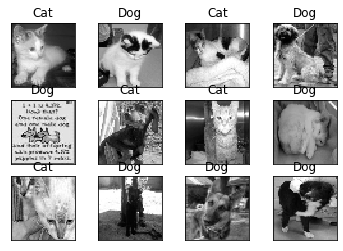

In [36]:

import matplotlib.pyplot as plt


test_data = process_test_data()


fig=plt.figure()

for num,data in enumerate(test_data[:12]):
    
    
    img_num = data[1]
    img_data = data[0]
    
    y = fig.add_subplot(3,4,num+1)
    orig = img_data
    data = img_data.reshape(IMG_SIZE,IMG_SIZE,1)
    
    model_out = model.predict([data])[0]
    
    if np.argmax(model_out) == 1: str_label='Dog'
    else: str_label='Cat'
        
    y.imshow(orig,cmap='gray')
    plt.title(str_label)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
plt.show()


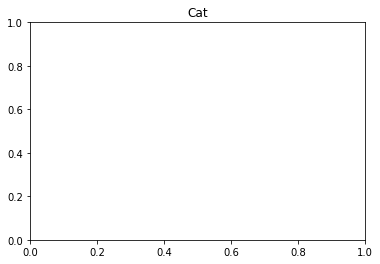

In [24]:
    model_out = model.predict([data])[0]
    orig = 'D:\dogs-vs-cats-redux-kernels-edition\train\train\dog.6054'
    orig = img_data
    data = img_data.reshape(IMG_SIZE,IMG_SIZE,1)
    
    if np.argmax(model_out) == 1: str_label='Dog'
    else: str_label='Cat'
        
    y.imshow(orig,cmap='gray')
    plt.title(str_label)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
plt.show()

In [1]:
#inclomplete